## Download and prepare the dataset

In [12]:
import numpy as np
import shutil
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import glob
import zipfile
from google.colab import drive

In [10]:
# Mount your Google Drive
drive.mount('/content/drive')

# Path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/ss_dataset.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!gdown "1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R&export=download"
!unzip ss_dataset.zip

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R&export=download 

unzip:  cannot find or open ss_dataset.zip, ss_dataset.zip.zip or ss_dataset.zip.ZIP.


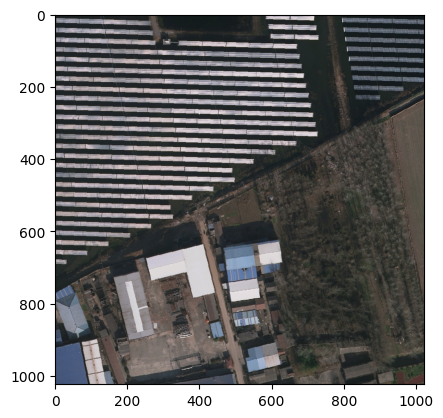

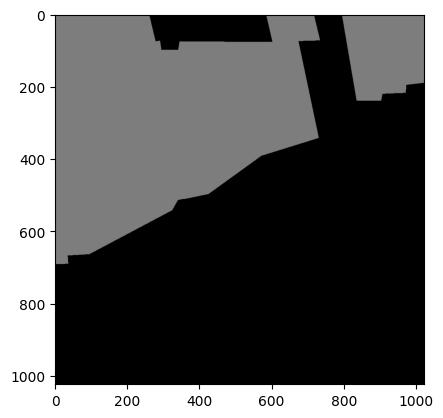

In [11]:
BASE_PATH = '/content/ss_dataset/3/567_label.bmp'
BASE_PATH1 = '/content/ss_dataset/3/567.bmp'

m2=cv2.imread(BASE_PATH1)[:,:,::-1]
plt.imshow(m2)
plt.show()

m1=cv2.imread(BASE_PATH)[:,:,::-1]
plt.imshow(m1)
plt.show()



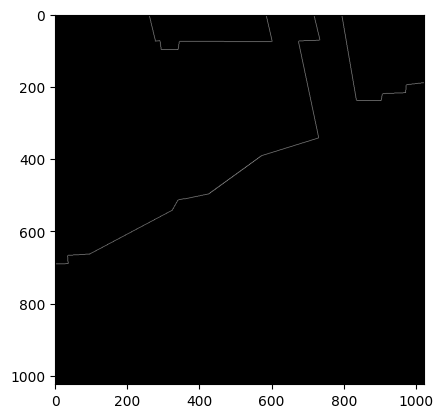

In [13]:
m1gray=cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)
edgesimg = cv2.Canny(m1gray,10,150)
plt.imshow(edgesimg,cmap='gray')




(1024, 1024, 3)


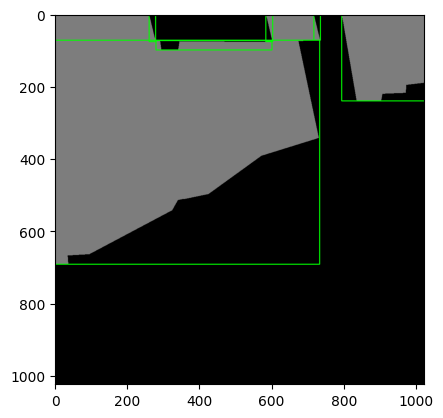

In [14]:
result=edgesimg.copy()
ss=m1.copy()
# Find contours in the binary image
contours, hierarchy = cv2.findContours(edgesimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles on the image for each contour
for contour in contours:
    # Find the bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Draw the rectangle on the image
    cv2.rectangle(ss, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(ss)
print(ss.shape)


In [18]:
def writeintxt(img,txt):
  m1gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  image_height,image_width=m1gray.shape
  edgesimg = cv2.Canny(m1gray,10,150)
  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(edgesimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # Draw rectangles on the image for each contour
  id=0
  with open(txt, 'w') as f:
    for contour in contours:
      # Find the bounding rectangle for the contour
      x, y, w, h = cv2.boundingRect(contour)
      center_x = (x + w / 2) / image_width
      center_y = (y + h / 2) / image_height
      norm_width = w / image_width
      norm_height = h / image_height
      print(center_x,center_y,norm_width,norm_height)
      f.write('{} {} {} {} {}\n'.format(id,center_x, center_y, norm_width, norm_height))
  f.close()
    # Draw the rectangle on the image

In [19]:
writeintxt(m1,"d.txt")

0.42919921875 0.083984375 0.3134765625 0.025390625
0.357421875 0.373046875 0.71484375 0.60546875
0.88720703125 0.1171875 0.2255859375 0.234375
0.7080078125 0.03515625 0.017578125 0.0703125
0.57861328125 0.037109375 0.0185546875 0.07421875
0.2626953125 0.037109375 0.017578125 0.07421875


In [17]:
root_dir = '/content/ss_dataset'

data_dir = os.path.join(root_dir)

image_root = '/content/train1'
label_root = '/content/train_masks'
if not os.path.isdir(image_root):
    os.mkdir(image_root)
if not os.path.isdir(label_root):
    os.mkdir(label_root)

images = list()
labels = list()

'''
Iterate the whole dataset and aggregate the files as png image file in train and train_masks
directories
'''
################################################
############## YOUR CODES GO HERE ##############
################################################


# خواندن همه فولدرهای موجود در مسیر منبع
subfolders = [f.path for f in os.scandir(root_dir) if f.is_dir()]

# بررسی فایل‌های موجود در هر فولدر و کپی کردن آنها در فولدر مقصد
for folder in subfolders:
    for root, dirs, files in os.walk(folder):
        for file in files:
            source_file_path = os.path.join(root, file)
            file_name = os.path.basename(source_file_path)
            folder_name=os.path.basename(folder)
            img = cv2.imread(source_file_path)
            if "label" in file_name:
              s=file_name.split('.')
              finalname=s[0]+"_"+folder_name+'.png'
              cv2.imwrite(os.path.join(label_root, finalname),img)
            else:
              s=file_name.split('.')
              finalname=s[0]+"_"+folder_name+'.png'
              cv2.imwrite(os.path.join(image_root, finalname),img)



In [20]:
print("Train set:  ", len(os.listdir("/content/train1")))
print("Train masks:", len(os.listdir("/content/train_masks")))

Train set:   2308
Train masks: 2308


In [21]:
'''
Create yolo-based labels for each image.
Consider the routine describes in the question.
Don't forget to split the dataset to train and val
Hint:
  https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
  https://docs.opencv.org/4.x/da/d0c/tutorial_bounding_rects_circles.html
'''

################################################
############## YOUR CODES GO HERE ##############
################################################


from sklearn.model_selection import train_test_split
import shutil

# مسیر پوشه‌ی آموزش
train_dir_images = "/content/train/images"

# مسیر پوشه‌ی ارزیابی
val_dir_images = "/content/val/images"

# مسیر پوشه‌ی آموزش
train_dir_labels = "/content/train/labels"

# مسیر پوشه‌ی ارزیابی
val_dir_labels = "/content/val/labels"

# تعداد تصاویر برای ارزیابی
val_size = 0.2


# گرفتن اسامی تمامی تصاویر
image_names = os.listdir(image_root)

# تقسیم داده‌ها به دو قسمت آموزش و ارزیابی
train_names, val_names = train_test_split(image_names, test_size=val_size, random_state=42)

# ایجاد پوشه‌های آموزش و ارزیابی
os.makedirs(train_dir_images, exist_ok=True)
os.makedirs(val_dir_images, exist_ok=True)
os.makedirs(train_dir_labels, exist_ok=True)
os.makedirs(val_dir_labels, exist_ok=True)

# کپی کردن تصاویر و برچسب‌ها در پوشه‌های آموزش و ارزیابی
for name in train_names:
    s= name.split('_')
    label_name=s[0]+"_"+"label"+"_"+s[1]
    shutil.copy(os.path.join(image_root, name), os.path.join(train_dir_images, name))
    maskimg=cv2.imread(os.path.join(label_root, label_name))
    n=name.split('.')
    n1=n[0]+".txt"
    writeintxt(maskimg,os.path.join(train_dir_labels, n1))
    # print(os.path.join(train_dir_labels, n1))

for name in val_names:
    s= name.split('_')
    label_name=s[0]+"_"+"label"+"_"+s[1]
    shutil.copy(os.path.join(image_root, name), os.path.join(val_dir_images, name))
    maskimg=cv2.imread(os.path.join(label_root, label_name))
    n=name.split('.')
    n1=n[0]+".txt"
    writeintxt(maskimg,os.path.join(val_dir_labels, n1))





Streaming output truncated to the last 5000 lines.
0.9541015625 0.73291015625 0.091796875 0.2880859375
0.74755859375 0.48681640625 0.1513671875 0.0849609375
0.74755859375 0.48681640625 0.1513671875 0.0849609375
0.7041015625 0.32373046875 0.19140625 0.1630859375
0.7041015625 0.32373046875 0.19140625 0.1630859375
0.89697265625 0.333984375 0.2060546875 0.400390625
0.93359375 0.90673828125 0.1328125 0.1865234375
0.9287109375 0.177734375 0.142578125 0.32421875
0.8955078125 0.2646484375 0.208984375 0.498046875
0.0751953125 0.9736328125 0.12109375 0.037109375
0.0751953125 0.9736328125 0.12109375 0.037109375
0.283203125 0.88623046875 0.56640625 0.2275390625
0.78759765625 0.8798828125 0.4248046875 0.240234375
0.248046875 0.61572265625 0.125 0.0634765625
0.248046875 0.61572265625 0.125 0.0634765625
0.18408203125 0.4775390625 0.1259765625 0.041015625
0.18408203125 0.4775390625 0.1259765625 0.041015625
0.7783203125 0.47412109375 0.443359375 0.5732421875
0.279296875 0.4091796875 0.55859375 0.732421

In [22]:

print("Train:", len(os.listdir("/content/train/images")))
print("Val:", len(os.listdir("/content/val/images")))

Train: 1846
Val: 462


In [23]:
!ls train/images/*.png | wc -l

1846


In [24]:
!ls train/labels/*.txt | wc -l

1846


1846
train/labels/117_2.txt


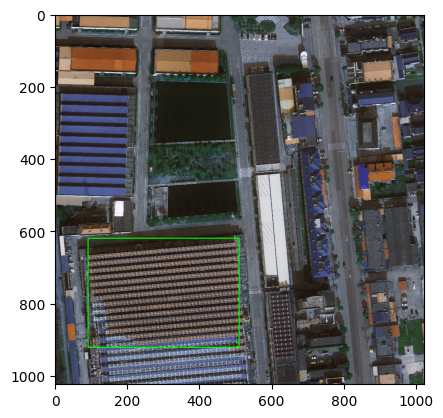

train/labels/61_3.txt


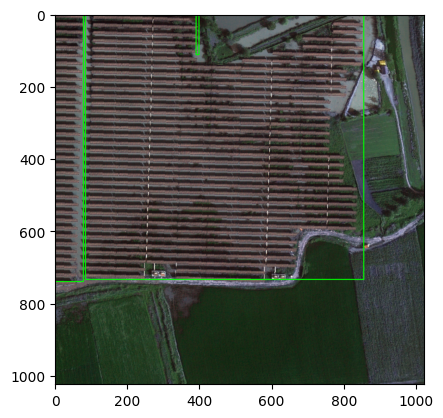

train/labels/205_0.txt


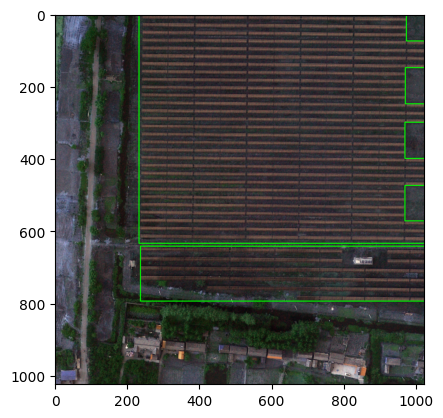

train/labels/5_4.txt


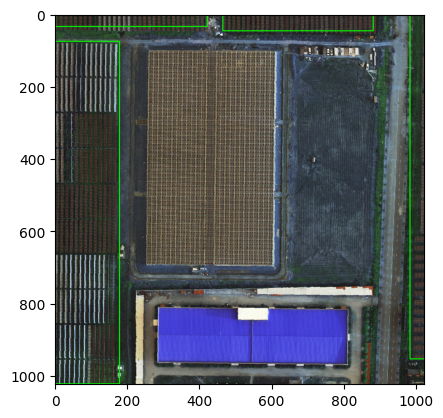

train/labels/444_3.txt


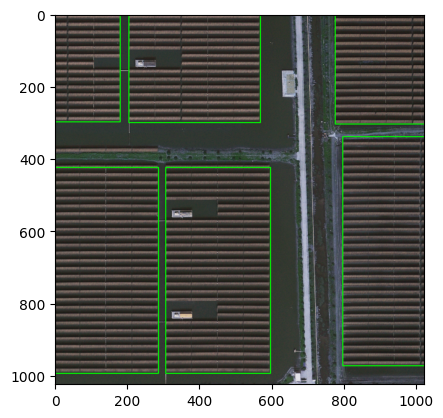

train/labels/99_4.txt


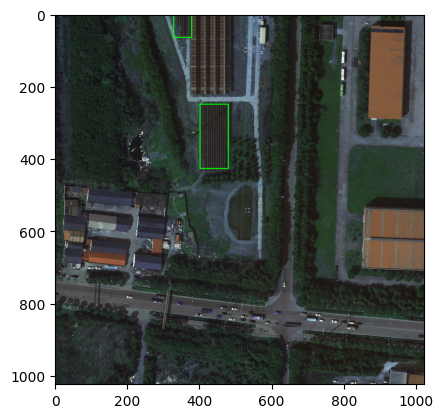

train/labels/25_2.txt


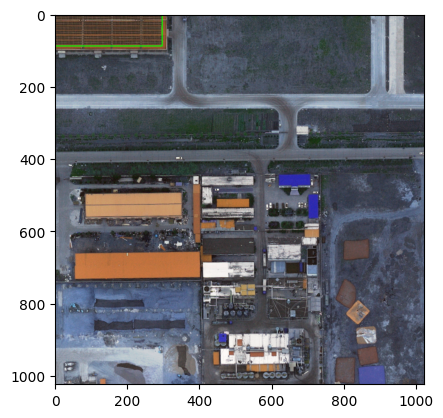

train/labels/49_5.txt


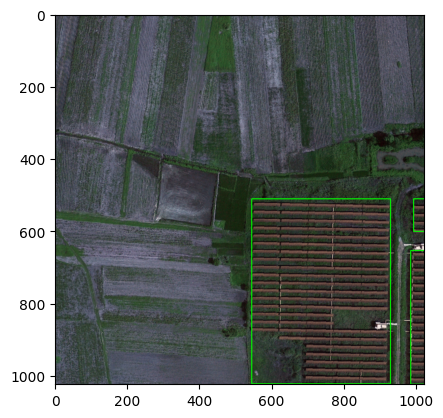

train/labels/30_0.txt


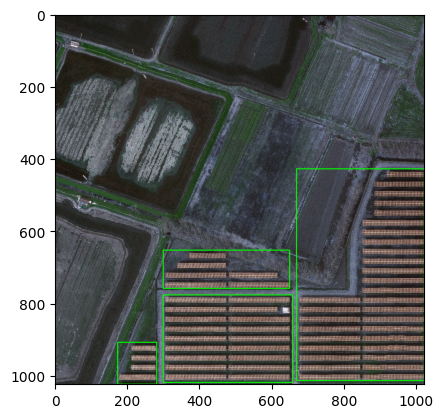

train/labels/334_0.txt


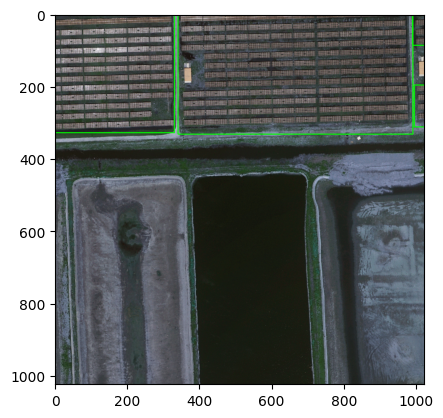

In [25]:
def plot_bbox_on_img(rect, img):
    '''
    draw the rects around objects and show the result
    '''

    ################################################
    ############## YOUR CODES GO HERE ##############
    imgfile =cv2.imread(img)
    with open(rect, 'r') as f:
       lines = f.readlines()

    for line in lines:
      # Split the line into its five components
      components = line.strip().split()

      # Extract the bounding box coordinates
      x = int(float(components[1]) * imgfile.shape[1])
      y = int(float(components[2]) * imgfile.shape[0])
      w = int(float(components[3]) * imgfile.shape[1])
      h = int(float(components[4]) * imgfile.shape[0])

      # Draw the bounding box on the image
      cv2.rectangle(imgfile, (x-w//2, y-h//2), (x+w//2 , y+h//2), (0, 255, 0), 2)

    ################################################
    plt.imshow(imgfile)
    plt.show()

base_path = 'train/images'
txtsPath = 'train/labels'

txts = glob.glob(os.path.join(txtsPath, '*.txt'))
print(len(txts))

for txt in txts[:10]:
      # x=cv2.imread(os.path.join(base_path, '{}.png'.format(txt.split('/')[-1].split('.')[0])))
      # plt.imshow(x)
      # plt.show()
     print(txt)
     plot_bbox_on_img(txt, os.path.join(base_path, '{}.png'.format(txt.split('/')[-1].split('.')[0])))

## Train the model

In [26]:
#### Clone the codes from repo: https://github.com/WongKinYiu/yolov7.git
#### Read the readme file

################################################
############## YOUR CODES GO HERE ##############
################################################

!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1191, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1191 (delta 2), reused 5 (delta 2), pack-reused 1185
Receiving objects: 100% (1191/1191), 74.23 MiB | 30.42 MiB/s, done.
Resolving deltas: 100% (514/514), done.


In [27]:
!pip install -r /content/yolov7/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [37]:
%cd /content/yolov7
!ls
# !python train.py --weights yolov7.pt --data "data/custom.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# !python train.py --weights yolov7.pt --data "data/custom.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml

#

# Define the path to the custom.yaml file
yaml_path = os.path.join('/content/yolov7', 'data', 'custom.yaml')

# Check if the file exists
if not os.path.isfile(yaml_path):
    print(f'Error: {yaml_path} not found')
else:
    # Do something with the file
    print(f'Found: {yaml_path}')

!python3 train.py --weights yolov7.pt --data "./data/custom.yaml" --workers 4 --batch-size 4 --img 1024 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml --epochs 10

/content/yolov7
cfg	   export.py   LICENSE.md   README.md	      test.py	    utils
data	   figure      models	    requirements.txt  tools	    yolov7.pt
deploy	   hubconf.py  paper	    runs	      train_aux.py
detect.py  inference   __pycache__  scripts	      train.py
Found: /content/yolov7/data/custom.yaml
2023-07-07 21:08:11.314279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 21:08:13.689195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='./data/custom.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=10, batch_size=4, img_size=[1024, 1024], rect=False,

## Inference the trained model

In [51]:
!pip install git+https://github.com/ultralytics/yolov5.git@v5.0

  Cloning https://github.com/ultralytics/yolov5.git (to revision v5.0) to /tmp/pip-req-build-viu_x2pz
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-viu_x2pz
  Running command git checkout -q f5b8f7d54c9fa69210da0177fec7ac2d9e4a627c
  Resolved https://github.com/ultralytics/yolov5.git to commit f5b8f7d54c9fa69210da0177fec7ac2d9e4a627c
ERROR: git+https://github.com/ultralytics/yolov5.git@v5.0 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [53]:
!sudo find / -name "*.pt" -type f

find: ‘/proc/60/task/60/net’: Invalid argument
find: ‘/proc/60/net’: Invalid argument
find: ‘/proc/11119/task/11119/net’: Invalid argument
find: ‘/proc/11119/net’: Invalid argument
/usr/share/vim/vim81/tutor/tutor.pt
/content/yolov7/yolov7.pt
/content/yolov7/runs/train/yolov74/weights/init.pt
/content/yolov7/runs/train/yolov74/weights/epoch_006.pt
/content/yolov7/runs/train/yolov74/weights/epoch_007.pt
/content/yolov7/runs/train/yolov74/weights/last.pt
/content/yolov7/runs/train/yolov74/weights/epoch_005.pt
/content/yolov7/runs/train/yolov74/weights/epoch_008.pt
/content/yolov7/runs/train/yolov74/weights/best.pt
/content/yolov7/runs/train/yolov74/weights/epoch_009.pt
/content/yolov7/runs/train/yolov74/weights/epoch_000.pt
/content/yolov7/runs/train/yolov73/weights/init.pt
/content/yolov7/runs/train/yolov73/weights/last.pt
/content/yolov7/runs/train/yolov73/weights/best.pt
/content/yolov7/runs/train/yolov73/weights/epoch_000.pt


In [55]:
### Show the results


################################################
############## YOUR CODES GO HERE ##############
################################################
%cd /content/yolov7

# !python detect.py --weights runs/train/yolov7/weights/best.pt --source "/content/train/images/0_1.png"


!python detect.py --weights /content/yolov7/runs/train/yolov74/weights/best.pt --source /content/train/images/0_1.png --img-size 1024 --conf 0.25

/content/yolov7
Namespace(weights=['/content/yolov7/runs/train/yolov74/weights/best.pt'], source='/content/train/images/0_1.png', img_size=1024, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 trac